<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Data_analytics/blob/main/IKEA_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install library yang dibutuhkan
!pip install pandas
!pip install nltk
!pip install transformers
!pip install matplotlib

# Import library
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download resources nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
# Load Data dari file CSV
try:
    df = pd.read_csv("ikea.csv")
except FileNotFoundError:
    print("File ikea.csv tidak ditemukan. Pastikan file tersebut ada di direktori yang benar.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")

if 'df' in locals():
    print("Data berhasil di-load.")
    # Tampilkan beberapa baris pertama untuk verifikasi
    print(df.head())

Data berhasil di-load.
   conversation_id_str                      created_at  favorite_count  \
0  1873870431343526273  Tue Dec 31 23:59:13 +0000 2024               0   
1  1874212612453654888  Tue Dec 31 22:07:48 +0000 2024               0   
2  1874205225260663153  Tue Dec 31 21:29:42 +0000 2024               1   
3  1874150843521654822  Tue Dec 31 19:18:59 +0000 2024               0   
4  1874171350308548690  Tue Dec 31 19:10:44 +0000 2024               0   

                                           full_text               id_str  \
0  @velvet__daze ace tuh brand lokal bukan ya? ka...  1874243946244956461   
1                                  @d3adfix Ikea tas  1874215906865557916   
2  @UtanoPandora IKEA MENTION! https://t.co/6n1nu...  1874206318866944130   
3  @brobroronto GOAT interior design kalo sampe a...  1874173425251738034   
4  Efek minum kopi IKEA refill 2x.. Jam segini ma...  1874171350308548690   

                                           image_url in_reply_to_scre

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')
def preprocess_tweet(text):
    # Hapus mention (@username)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # Hapus URL
    text = re.sub(r'http\S+', '', text)
    # Hapus tanda baca dan karakter non-alphanumeric
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Hapus hashtag
    text = re.sub(r'#\w+', '', text)
    # Lowercase text
    text = text.lower()
    # Tokenisasi
    tokens = word_tokenize(text)
     # Stop words kustom
    custom_stopwords = set(stopwords.words('english')) - set(['not', 'but', 'never'])
    filtered_tokens = [word for word in tokens if word not in custom_stopwords]
    # Gabungkan kembali tokens
    text = ' '.join(filtered_tokens)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
if 'df' in locals():
  # Fungsi untuk mendapatkan sentimen dengan VADER
  def get_vader_sentiment(text):
      analyzer = SentimentIntensityAnalyzer()
      scores = analyzer.polarity_scores(text)
      if scores['compound'] >= 0.05:
          return 'positive'
      elif scores['compound'] <= -0.05:
          return 'negative'
      else:
          return 'neutral'

  # Terapkan analisis sentimen VADER
  df['vader_sentiment'] = df['cleaned_text'].apply(get_vader_sentiment)

  print("Analisis sentimen VADER selesai.")
  print(df[['full_text', 'cleaned_text', 'vader_sentiment']].head())

Analisis sentimen VADER selesai.
                                           full_text  \
0  @velvet__daze ace tuh brand lokal bukan ya? ka...   
1                                  @d3adfix Ikea tas   
2  @UtanoPandora IKEA MENTION! https://t.co/6n1nu...   
3  @brobroronto GOAT interior design kalo sampe a...   
4  Efek minum kopi IKEA refill 2x.. Jam segini ma...   

                                        cleaned_text vader_sentiment  
0  daze ace tuh brand lokal bukan ya kalo apakah ...        negative  
1                                           ikea tas         neutral  
2                                       ikea mention         neutral  
3  goat interior design kalo sampe ada furniture ...         neutral  
4  efek minum kopi ikea refill 2x jam segini masi...         neutral  


In [12]:
if 'df' in locals():
  # Hitung jumlah sentimen
  sentiment_counts = df['vader_sentiment'].value_counts()
  print("Distribusi sentimen:")
  print(sentiment_counts)

  # Hitung proporsi sentimen
  sentiment_proportions = df['vader_sentiment'].value_counts(normalize=True) * 100
  print("\nProporsi sentimen (%):")
  print(sentiment_proportions)

Distribusi sentimen:
vader_sentiment
neutral     176
positive     30
negative     10
Name: count, dtype: int64

Proporsi sentimen (%):
vader_sentiment
neutral     81.481481
positive    13.888889
negative     4.629630
Name: proportion, dtype: float64


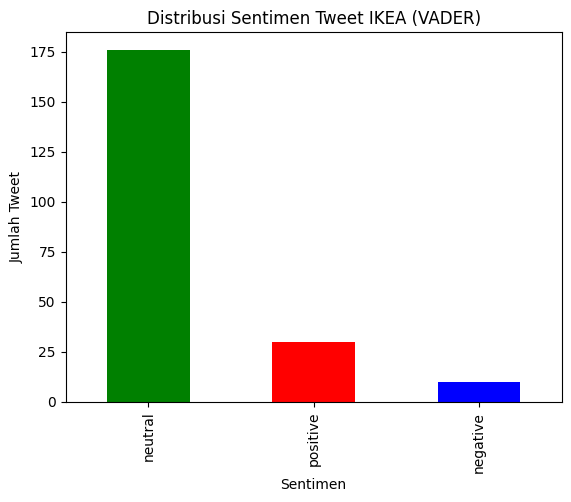

In [9]:
if 'df' in locals():
  # Visualisasi distribusi sentimen
  sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], title='Distribusi Sentimen Tweet IKEA (VADER)')
  plt.xlabel('Sentimen')
  plt.ylabel('Jumlah Tweet')
  plt.show()

In [13]:
if 'df' in locals():
  print("\nInterpretasi Hasil:")
  print("Berdasarkan analisis sentimen VADER, kita dapat melihat distribusi dan proporsi sentimen terkait IKEA di Twitter. "
        "Sentimen 'positive' menunjukkan tweet yang mengungkapkan pengalaman positif terhadap IKEA. "
        "Sentimen 'negative' mengindikasikan tweet dengan keluhan atau kritikan. "
        "Sentimen 'neutral' menggambarkan tweet yang tidak memiliki konotasi positif atau negatif yang kuat.")
  print("Analisis ini membantu dalam memahami opini publik terkait brand IKEA dan dapat digunakan untuk meningkatkan strategi bisnis, "
        "seperti memperbaiki area layanan yang mendapatkan banyak keluhan atau mempertahankan aspek produk yang dipuji.")

  print("\nSaran:")
  print("- Perhatikan proporsi sentimen 'negative' dan analisis lebih lanjut isi tweet untuk mengidentifikasi masalah yang perlu diperbaiki. "
        "- Terus pantau sentimen publik untuk memahami perubahan tren dan kebutuhan pelanggan.")


Interpretasi Hasil:
Berdasarkan analisis sentimen VADER, kita dapat melihat distribusi dan proporsi sentimen terkait IKEA di Twitter. Sentimen 'positive' menunjukkan tweet yang mengungkapkan pengalaman positif terhadap IKEA. Sentimen 'negative' mengindikasikan tweet dengan keluhan atau kritikan. Sentimen 'neutral' menggambarkan tweet yang tidak memiliki konotasi positif atau negatif yang kuat.
Analisis ini membantu dalam memahami opini publik terkait brand IKEA dan dapat digunakan untuk meningkatkan strategi bisnis, seperti memperbaiki area layanan yang mendapatkan banyak keluhan atau mempertahankan aspek produk yang dipuji.

Saran:
- Perhatikan proporsi sentimen 'negative' dan analisis lebih lanjut isi tweet untuk mengidentifikasi masalah yang perlu diperbaiki. - Terus pantau sentimen publik untuk memahami perubahan tren dan kebutuhan pelanggan.
